In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
cwd = os.getcwd().replace("/note/qco", "")
os.chdir(cwd)
os.getcwd()


'/Users/loutrebleu/workspace/qml'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

In [10]:
from qml.db.ml import MLDatasetGenerator
from qml.tools.dataloader import DataLoader
import qml.db.target as xtarget

In [86]:
tfun = xtarget.PolynominalTargetFunctionGenerator(2)
tgen = MLDatasetGenerator(tfun)
dataset = tgen.generate(30)
loader = DataLoader.from_dataset(dataset, batch_size=1, shuffle=False)

### Parameters

In [87]:
nq = 2
shots = 1000

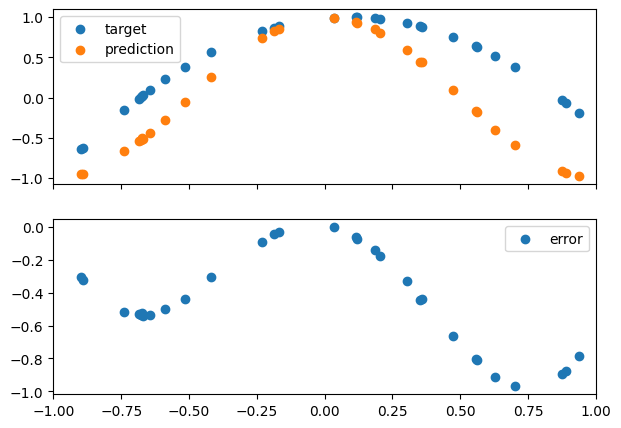

In [93]:
def predict(nq, x, shots=1000):
    # prepare encoding
    th = np.pi * x

    # build circuit
    qc = QuantumCircuit(nq, 1)
    qr = qc.qubits
    qc.ry(th, qr)
    
    # measure
    qc.measure(0, 0)

    # run
    sim = AerSimulator()
    res = sim.run(qc, shots=shots).result().get_counts()
    val = (res.get("0", 0) - res.get("1", 0)) / shots
    return val

ps = []
es = []
for x, y in loader:
    x = x.squeeze()
    y = y.squeeze()
    p = predict(nq, x, shots=shots*10)
    e = p - y
    ps.append(p)
    es.append(e)


ps = np.asarray(ps)
es = np.asarray(es)
xs = dataset.xs.squeeze()
ys = dataset.ys.squeeze()

fig, axes = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
axes[0].scatter(xs, ys, label="target")
axes[0].scatter(xs, ps, label="prediction")
axes[1].scatter(xs, es, label="error")
axes[0].legend()
axes[1].legend()
axes[1].set_xlim(-1, 1)
plt.show()

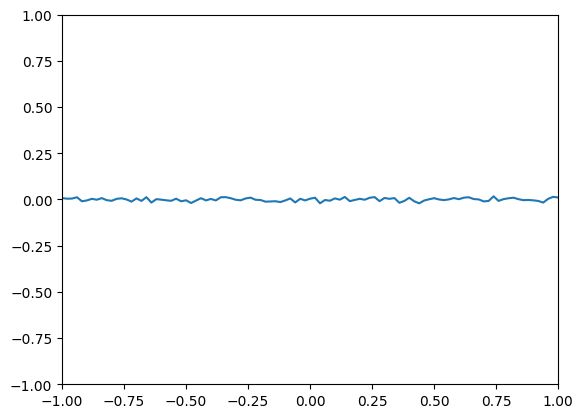

In [100]:
def predict_h(nq, shots=1000):
    qc = QuantumCircuit(nq, 1)
    qr = qc.qubits
    qc.h(qr)
    qc.measure(0, 0)

    sim = AerSimulator()
    res = sim.run(qc, shots=shots).result().get_counts()
    val = (res.get("0", 0) - res.get("1", 0)) / shots
    return val

xs = np.linspace(-1, 1, 101)
ps = np.array([predict_h(1, 10000) for x in xs])

plt.plot(xs, ps)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [ ]:
def predict_hrx(nq, i, th):
    qc = QuantumCircuit(nq, 1)
    qr = qc.qubits
    qc.h(qr)
    qc.rx(th, qr)
    qc.measure(0, 0)

    sim = AerSimulator()
    res = sim.run(qc, shots=shots).result().get_counts()
    val = (res.get("0", 0) - res.get("1", 0)) / shots
    return val

xs = np.linspace(-1, 1, 101)
ps = np.array([
    predict_hrx(1, 0, np.pi * x)
    for x in xs
])

plt.plot(xs, ps)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()